# TASK1: Predict the percentage of a student based on the number of study hours

# Importing Librairies 

In [94]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


# Data Analysis


# Loading the data


In [3]:
data=pd.read_csv("task1Data.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape


(25, 2)

In [5]:
data.columns.to_list()

['Hours', 'Scores']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [18]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Verifying the missing values

In [7]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

# Statistical Summary 

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [15]:
corr=data.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# DATA VISUALISATION


<AxesSubplot:>

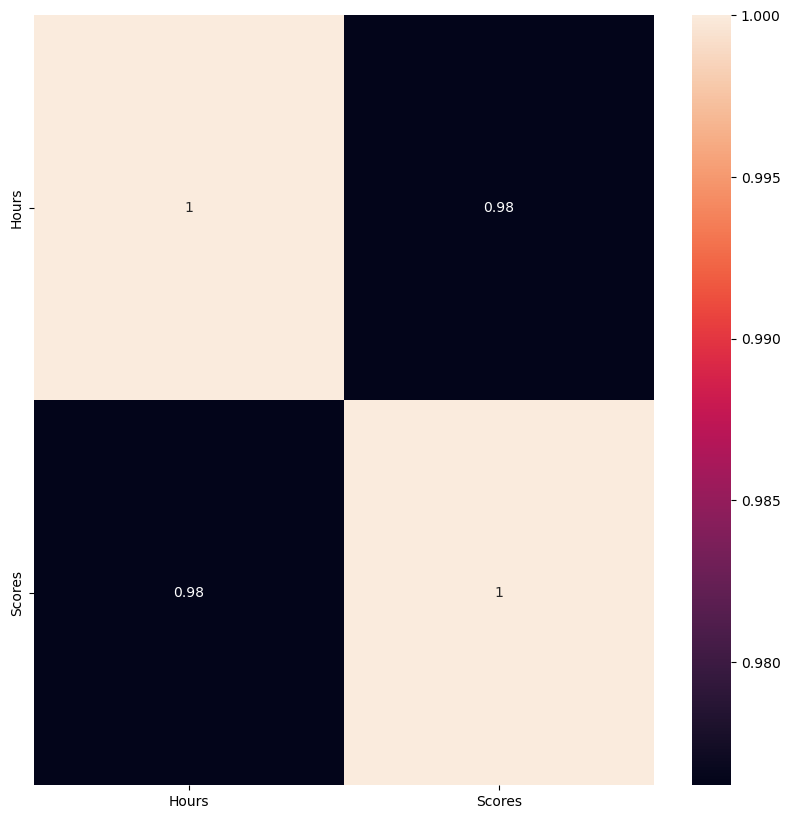

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Viewing the Outliers 

In [19]:
list=['Hours','Scores']

<AxesSubplot:>

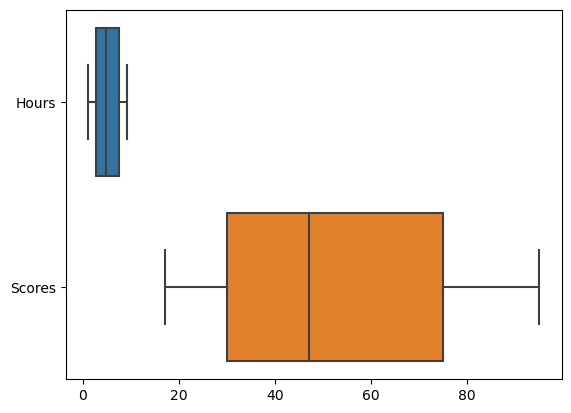

In [21]:
sns.boxplot(data = data[list],orient = 'h')

# Data Distribution 

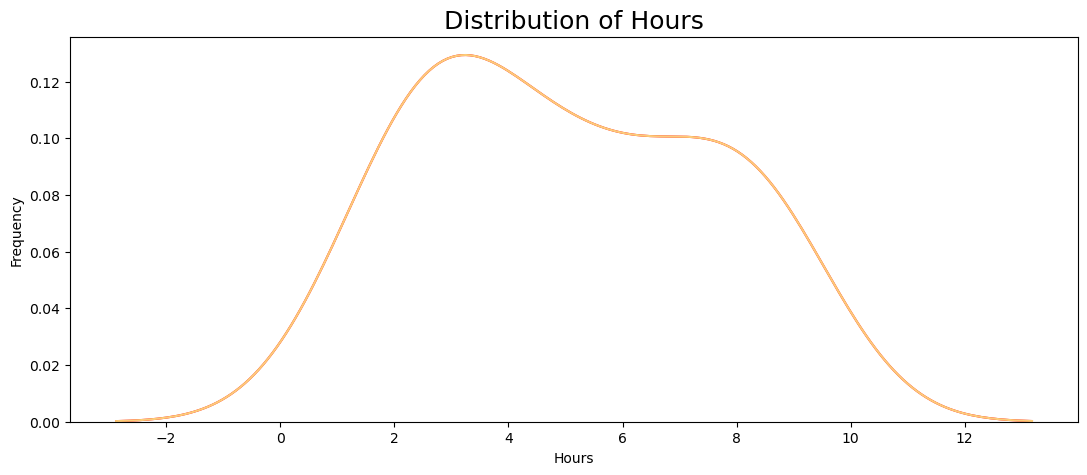

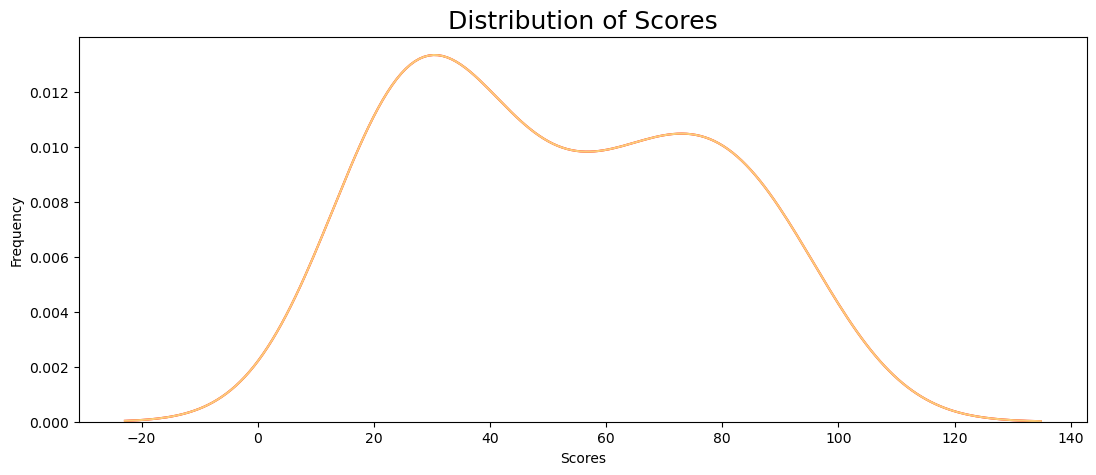

In [14]:
for col in data:
    fig, ax = plt.subplots(figsize = (13,5))
    sns.kdeplot(data[col], color="red", label="Scores", ax = ax)
    sns.kdeplot(data[col],  color="#fccc79", label="Normal", ax = ax)
    plt.title('Distribution of '+col, fontsize = 18)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    plt.show()

Percentage of Scores VS Hours 

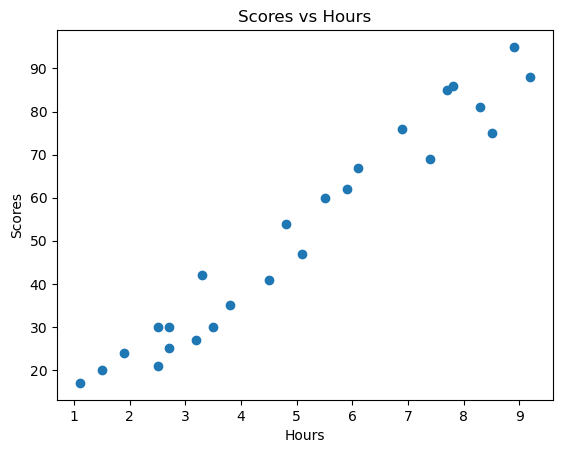

In [29]:
# Create a scatter plot
plt.scatter(data['Hours'], data['Scores'])

# Set labels for x-axis and y-axis
plt.xlabel('Hours')
plt.ylabel('Scores')

# Set title for the plot
plt.title('Scores vs Hours')

# Display the plot
plt.show()

# Data Modelling

# Train-Test Split

In [76]:
# Split the data into features (X) and target variable (y)
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Print the sizes of the train and test sets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 17
Testing set size: 8


# Training the Linear Regression model on the Training set

In [77]:
# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training data
y_pred = model.predict(X)


# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [9.78856669]
Intercept: 2.3708153823418883


# Model evaluation

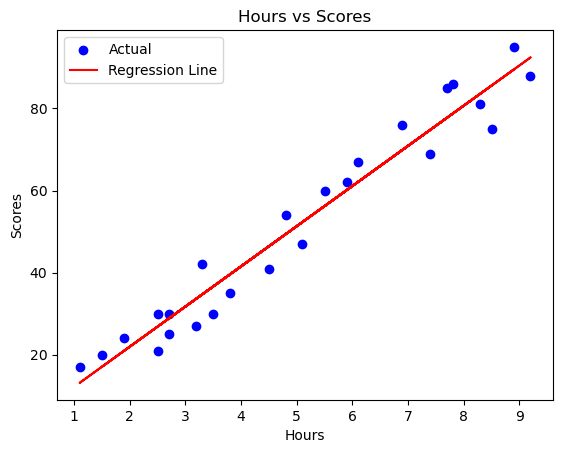

In [78]:
# Plot the scatter plot of actual data points
plt.scatter(X, y, color='blue', label='Actual')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Set plot labels and title
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [79]:
#Predicting the Test set results
y_pred = model.predict(X_test)
print(y_pred)

# Compare the actual and predicted scores
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]
   Actual  Predicted
0      20  17.053665
1      27  33.694229
2      69  74.806209
3      30  26.842232
4      62  60.123359
5      35  39.567369
6      24  20.969092
7      86  78.721636


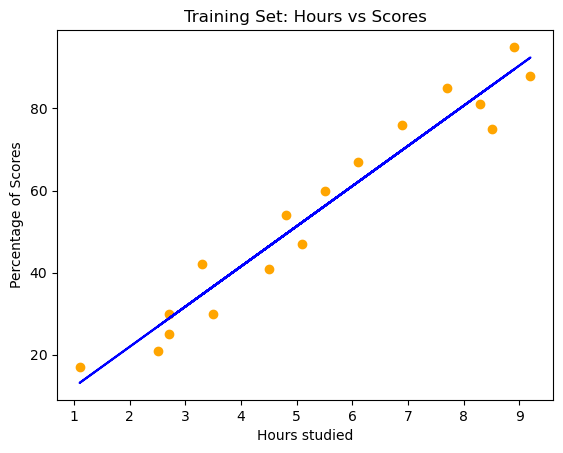

In [80]:
#Visualising the Training set results
# Plot the training set
plt.scatter(X_train, y_train, color='orange')
plt.plot(X_train, model.predict(X_train), color='blue')

# Set plot labels and title
plt.xlabel('Hours studied')
plt.ylabel('Percentage of Scores')
plt.title('Training Set: Hours vs Scores')

# Display the plot
plt.show()

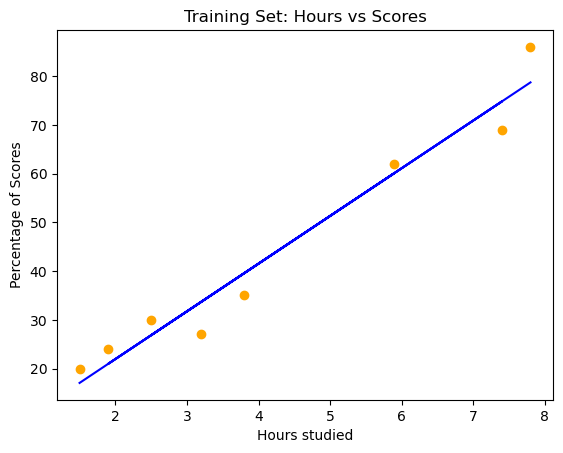

In [81]:
#Visualising the Test set results
# Plot the test set
plt.scatter(X_test, y_test, color='orange')
plt.plot(X_test, model.predict(X_test), color='blue')

# Set plot labels and title
plt.xlabel('Hours studied')
plt.ylabel('Percentage of Scores')
plt.title('Training Set: Hours vs Scores')

# Display the plot
plt.show()

In [82]:
# Compare the actual and predicted scores
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

   Actual  Predicted
0      20  17.053665
1      27  33.694229
2      69  74.806209
3      30  26.842232
4      62  60.123359
5      35  39.567369
6      24  20.969092
7      86  78.721636


# Predictions


In [93]:
# Make predictions on new data
new_data = pd.DataFrame({'Hours': [5.7, 3.2, 6.9]})  # Example new data with hours
predictions = model.predict(new_data)

# Print the predictions
for i in range(len(new_data)):
    print("Prediction for {} hours: {:.2f}".format(new_data.iloc[i]['Hours'], predictions[i]))

Prediction for 5.7 hours: 58.17
Prediction for 3.2 hours: 33.69
Prediction for 6.9 hours: 69.91


In [97]:
# Predict the score for a student who studied 9.25 hours
hours = 9.25
prediction = model.predict([[hours]])
print("Predicted score for studying {:.2f} hours: {:.2f}".format(hours, prediction[0]))


Predicted score for studying 9.25 hours: 92.92


# Error Metrics 

In [89]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027651


In [90]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 22.965097212700428


In [95]:
print('The R-Square of the model is: ', r2_score(y_test,y_pred))

The R-Square of the model is:  0.9568211104435257


# Conclusion

We trained a linear regression model to predict the scores of students based on the number of hours they studied. Using this model, we predicted that a student who studies 9.25 hours would likely achieve a score of approximately 92.92.
